# **Financial Risk Data Analysis**

In [1]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Load dataset

In [2]:
# import dataset
df = pd.read_csv('datasets/financial_risk_assessment.csv')

# check column names
df.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating'],
      dtype='object')

# **Preprocessing**

Data shape

In [3]:
# dataset shape
df.shape

(15000, 20)

Feature standardization

In [4]:
# convert all column names to lower case and replace spaces and dashes with underscore
df.columns = [col.replace(" ", '_').replace("-", "_").lower() for col in df.columns]
df.columns

Index(['age', 'gender', 'education_level', 'marital_status', 'income',
       'credit_score', 'loan_amount', 'loan_purpose', 'employment_status',
       'years_at_current_job', 'payment_history', 'debt_to_income_ratio',
       'assets_value', 'number_of_dependents', 'city', 'state', 'country',
       'previous_defaults', 'marital_status_change', 'risk_rating'],
      dtype='object')

Inspect first and last five rows

In [5]:
# inspect first five entries
df.head()

,age,gender,education_level,marital_status,income,credit_score,loan_amount,loan_purpose,employment_status,years_at_current_job,payment_history,debt_to_income_ratio,assets_value,number_of_dependents,city,state,country,previous_defaults,marital_status_change,risk_rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [6]:
# inspect last five entries
df.tail()

,age,gender,education_level,marital_status,income,credit_score,loan_amount,loan_purpose,employment_status,years_at_current_job,payment_history,debt_to_income_ratio,assets_value,number_of_dependents,city,state,country,previous_defaults,marital_status_change,risk_rating
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High
14999,24,Non-binary,Bachelor's,Widowed,NaN,765.0,NaN,Personal,Self-employed,18,Excellent,0.116083,71699.0,3.0,South Stacy,WA,Saint Pierre and Miquelon,3.0,2,Low


Check five descriptive statistics

In [7]:
# descriptive statistics
df.describe()

,age,income,credit_score,loan_amount,years_at_current_job,debt_to_income_ratio,assets_value,number_of_dependents,previous_defaults,marital_status_change
count,15000.000000,12750.000000,12750.000000,12750.000000,15000.000000,15000.000000,12750.000000,12750.00000,12750.000000,15000.000000
mean,43.452667,69933.398510,699.109098,27450.010902,9.476267,0.350438,159741.497176,2.02651,1.992471,0.998467
std,14.910732,29163.626207,57.229465,12949.940135,5.769707,0.143919,80298.115832,1.41130,1.416909,0.813782
min,18.000000,20005.000000,600.000000,5000.000000,0.000000,0.100004,20055.000000,0.00000,0.000000,0.000000
25%,31.000000,44281.500000,650.000000,16352.500000,4.000000,0.227386,90635.250000,1.00000,1.000000,0.000000
50%,43.000000,69773.000000,699.000000,27544.000000,9.000000,0.350754,159362.000000,2.00000,2.000000,1.000000
75%,56.000000,95922.750000,748.000000,38547.500000,15.000000,0.476095,228707.000000,3.00000,3.000000,2.000000
max,69.000000,119997.000000,799.000000,49998.000000,19.000000,0.599970,299999.000000,4.00000,4.000000,2.000000


Check datatypes and missing values

In [8]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    15000 non-null  int64  
 1   gender                 15000 non-null  object 
 2   education_level        15000 non-null  object 
 3   marital_status         15000 non-null  object 
 4   income                 12750 non-null  float64
 5   credit_score           12750 non-null  float64
 6   loan_amount            12750 non-null  float64
 7   loan_purpose           15000 non-null  object 
 8   employment_status      15000 non-null  object 
 9   years_at_current_job   15000 non-null  int64  
 10  payment_history        15000 non-null  object 
 11  debt_to_income_ratio   15000 non-null  float64
 12  assets_value           12750 non-null  float64
 13  number_of_dependents   12750 non-null  float64
 14  city                   15000 non-null  object 
 15  st

Show number of null values

In [9]:
# Show null values
df.isna().sum()

age                         0
gender                      0
education_level             0
marital_status              0
income                   2250
credit_score             2250
loan_amount              2250
loan_purpose                0
employment_status           0
years_at_current_job        0
payment_history             0
debt_to_income_ratio        0
assets_value             2250
number_of_dependents     2250
city                        0
state                       0
country                     0
previous_defaults        2250
marital_status_change       0
risk_rating                 0
dtype: int64

In [10]:
# further check on the nature of null values to know how to handle them
df['income']

0         72799.0
1             NaN
2         55687.0
3         26508.0
4         49427.0
           ...   
14995     48088.0
14996    107193.0
14997     46250.0
14998     40180.0
14999         NaN
Name: income, Length: 15000, dtype: float64

In [11]:
# Given that, in the bank, under age kids could have accounts and have no income, 
# checking age and income
print(f"There are {df[df['age'] < 18].count().sum()} number of under aged")

There are 0 number of under aged


Drop null values

In [12]:
# dropping  rows with no income
df.dropna(subset = ['income', 'credit_score'], inplace=True)
df.isna().sum()

age                         0
gender                      0
education_level             0
marital_status              0
income                      0
credit_score                0
loan_amount              1595
loan_purpose                0
employment_status           0
years_at_current_job        0
payment_history             0
debt_to_income_ratio        0
assets_value             1642
number_of_dependents     1603
city                        0
state                       0
country                     0
previous_defaults        1649
marital_status_change       0
risk_rating                 0
dtype: int64

In [13]:
df['assets_value'].unique

<bound method Series.unique of 0        120228.0
2        180700.0
3        157319.0
4        287140.0
6             NaN
           ...   
14994     32179.0
14995         NaN
14996     79102.0
14997    196930.0
14998    276060.0
Name: assets_value, Length: 10834, dtype: float64>

In [14]:
# setting nan for assets_value(they might have not assetts),
#  number_of_dependents (have no dependent), 
# loan_amount(have not taken loan before) and previous_defaults to 0
value = 0
df.fillna(value, inplace = True)

In [15]:
df.isna().sum()

age                      0
gender                   0
education_level          0
marital_status           0
income                   0
credit_score             0
loan_amount              0
loan_purpose             0
employment_status        0
years_at_current_job     0
payment_history          0
debt_to_income_ratio     0
assets_value             0
number_of_dependents     0
city                     0
state                    0
country                  0
previous_defaults        0
marital_status_change    0
risk_rating              0
dtype: int64

Convert prevous_defaults, number_of_dependents, assets_value

In [16]:
df[['previous_defaults', 'number_of_dependents']] = df[['previous_defaults', 'number_of_dependents']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10834 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    10834 non-null  int64  
 1   gender                 10834 non-null  object 
 2   education_level        10834 non-null  object 
 3   marital_status         10834 non-null  object 
 4   income                 10834 non-null  float64
 5   credit_score           10834 non-null  float64
 6   loan_amount            10834 non-null  float64
 7   loan_purpose           10834 non-null  object 
 8   employment_status      10834 non-null  object 
 9   years_at_current_job   10834 non-null  int64  
 10  payment_history        10834 non-null  object 
 11  debt_to_income_ratio   10834 non-null  float64
 12  assets_value           10834 non-null  float64
 13  number_of_dependents   10834 non-null  int64  
 14  city                   10834 non-null  object 
 15  state  

# **Exploratory Data Analysis**

Monovariate Analysis

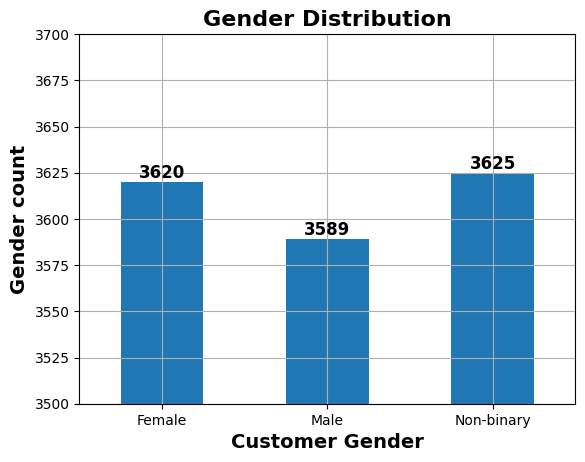

In [79]:
gender_dist = df.groupby(by='gender').size()

# plot gender distribution
gender_dist.plot(kind='bar')

# Annotate each bar with its value
for index, value in enumerate(gender_dist):
    plt.text(index, value, str(value), ha='center', va='bottom', fontdict={'fontsize':12, 'fontweight':'bold'})

plt.title('Gender Distribution', fontdict={'fontsize':16, 'fontweight': 'bold'})
plt.xlabel("Customer Gender", fontdict={'fontsize':14, 'fontweight':'bold'})
plt.ylabel("Gender count", fontdict={'fontsize':14, 'fontweight':'bold'})
plt.ylim(3500, 3700)
plt.xticks(rotation=0)
plt.grid()
plt.show();

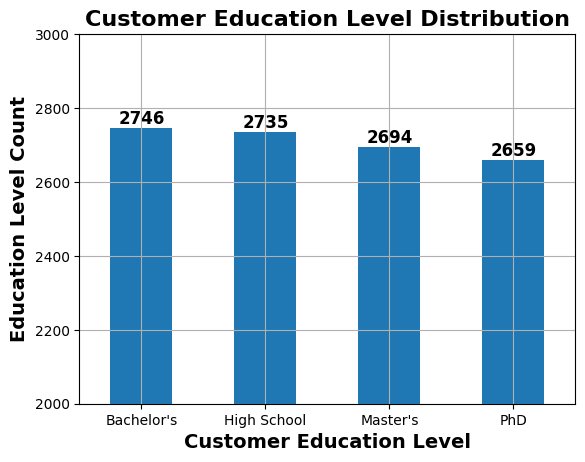

In [77]:
education_dist = df.groupby(by=['education_level']).size()

# plot education level
education_dist.plot(kind='bar')

# Annotate each bar with its value
for index, value in enumerate(education_dist):
    plt.text(index, value, str(value), ha='center', va='bottom', fontdict={'fontsize':12, 'fontweight':'bold'})

plt.xlabel('Customer Education Level', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.ylabel('Education Level Count', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.title('Customer Education Level Distribution', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.ylim(2000, 3000)
plt.xticks(rotation=0)
plt.grid()
plt.show();

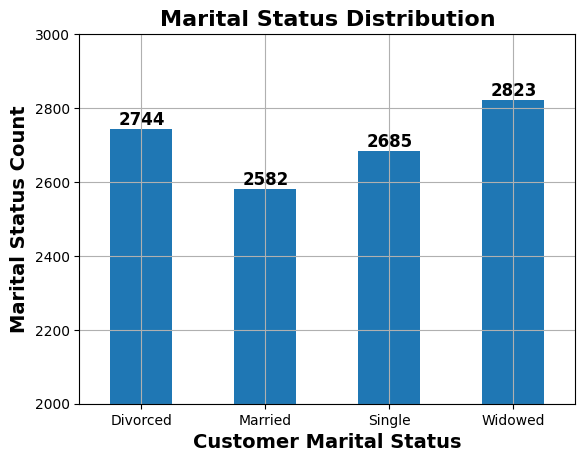

In [82]:
martial_status_dist = df.groupby(by='marital_status').size()
martial_status_dist.plot(kind='bar')

# Annotate each bar with its value
for index, value in enumerate(martial_status_dist):
    plt.text(index, value, str(value), ha='center', va='bottom', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.title('Marital Status Distribution', fontdict={'fontsize':16, 'fontweight': 'bold'})
plt.xlabel("Customer Marital Status", fontdict={'fontsize':14, 'fontweight':'bold'})
plt.ylabel("Marital Status Count", fontdict={'fontsize':14, 'fontweight':'bold'})
plt.ylim(2000, 3000)
plt.xticks(rotation=0)
plt.grid()
plt.show()


In [50]:
df.columns

Index(['age', 'gender', 'education_level', 'marital_status', 'income',
       'credit_score', 'loan_amount', 'loan_purpose', 'employment_status',
       'years_at_current_job', 'payment_history', 'debt_to_income_ratio',
       'assets_value', 'number_of_dependents', 'city', 'state', 'country',
       'previous_defaults', 'marital_status_change', 'risk_rating'],
      dtype='object')

Bivariate Analysis

Multivariate Analysis